
**Business Problem**\
Armut, Turkey's largest online service platform, connects service providers with customers. By using your computer or phone, you can get cleaning, modification, and transportation services.

The objective is to create a product recommendation system based on Association Rule Learning by using the data set containing the information about the users, as well as the services and categories that they have purchased.

**About Dataset**\
Customer services and their categories are included in the data set. This file contains information regarding the date and time of each service received.

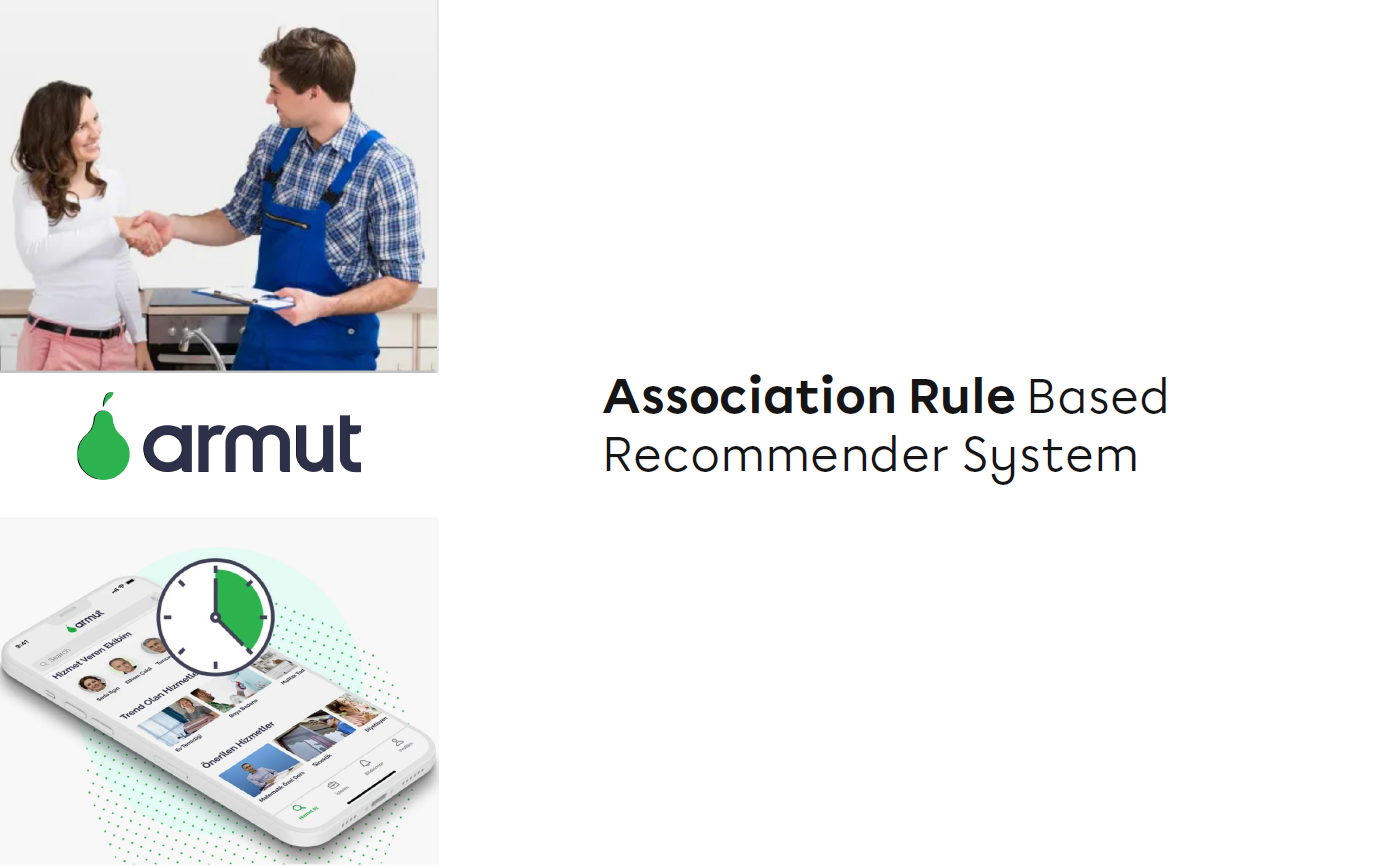

Information about the dataset:\
UserId; Customer Number\
ServiceId; They are anonymized services for each category.\
CategoryId; They are anonymized categories.\
CreateDate; The date the service was purchased\

### 1- Data Preprocessing

#### Importing Libraries

In [ ]:
!pip install mlxtend
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

#### Reading in a dataset

In [ ]:
df_ = pd.read_csv("../input/armut-data/armut_data.csv")

In [ ]:
df = df_.copy()

#### Exploratory Data Analysis

In [ ]:
def check_df(dataframe):
    print("**********head**********")
    print(dataframe.head())
    print("**********isna**********")
    print(dataframe.isnull().sum())
    print("**********shape*********")
    print(dataframe.shape)
    print("*********info***********")
    print(dataframe.info())
    print("*********describe*******")
    print(dataframe.describe().T)

In [ ]:
check_df(df)

#### Adding New Service Variable

ServiceID represents a different service for each CategoryID.

We create a new variable by combining ServiceID and CategoryID variable.

In [ ]:
df["Service"] = df["ServiceId"].astype(str) + "_" + df["CategoryId"].astype(str)

In [ ]:
df.head()

### 2- Development the Association Rule Learning

In order to apply Association Rule Learning, we need to define a basket variable. The basket are monthly services that purchase of each customer.

In [ ]:
df['CreateDate'] = pd.to_datetime(df['CreateDate'])
df['New_Date'] = df['CreateDate'].dt.strftime('%Y-%m')
df["BasketID"]=df["UserId"].astype(str)+"_"+ df["New_Date"].astype(str)
df.head()

In [ ]:
Pivot_Table= df.groupby(['BasketID', 'Service']).agg({'Service':'count'}).unstack(). \
fillna(0).applymap(lambda x: 1 if x > 0 else 0)
Pivot_Table.head()

In [ ]:
frequent_itemsets = apriori(Pivot_Table,
                            min_support=0.01,
                            use_colnames=True)

In [ ]:
frequent_itemsets = apriori(Pivot_Table,
                            min_support=0.01,
                            use_colnames=True)

rules = association_rules(frequent_itemsets,
                          metric='support',
                          min_threshold=0.01)


In [ ]:
rules.head()

#### Create New Function on ARL Recommendation

In [ ]:
rules[rules['antecedents'] == {('Service', '2_0')}].sort_values('confidence', ascending=False)